**Outliers** are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty.
In other words, an outlier is an observation that diverges from an overall pattern on a sample.


This data describes the characteristics of vehicles.
The below fields are included in considerataions

1.   city08
2.   city08U
3.   cityA08
4.   cityA08U
5.   cityCD
6.   cityE
7.   cityUF
8.   co2
9.   co2A
10.   co2TailpipeAGpm
11.   co2TailpipeGpm
12.   comb08
13.   comb08U
14.   combA08
15.   combA08U
16.   combE
17.   combinedCD
18.   combinedUF
19.   cylinders
20.   displ
21.   engId
22.   feScore
23.   fuelCost08
24.   fuelCostA08
25.   ghgScore
26.   ghgScoreA
27.   highway08
28.   highway08U
29.   highwayA08
30.   highwayA08U
31.   highwayCD
32.   highwayE
33.   highwayUF
34.   hlv
35.   hpv
36.   id
37.   lv2
38.   lv4
39.   pv2


In [0]:
# importing libaries ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
import seaborn as sns

In [134]:
## importing modules , reading the file 
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/My Drive/ColabData/vehicles.csv", header=1,
               names=["barrels08","barrelsA08","charge120","charge240","city08","city08U","cityA08","cityA08U","cityCD","cityE","cityUF","co2","co2A","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U","combA08","combA08U","combE","combinedCD","combinedUF","cylinders","displ","drive","engId","eng_dscr","feScore","fuelCost08","fuelCostA08","fuelType","fuelType1","ghgScore","ghgScoreA","highway08","highway08U","highwayA08","highwayA08U","highwayCD","highwayE","highwayUF","hlv","hpv","id","lv2","lv4","make","model","mpgData","phevBlended","pv2","pv4","range","rangeCity","rangeCityA","rangeHwy","rangeHwyA","trany","UCity","UCityA","UHighway","UHighwayA","VClass","year","youSaveSpend","guzzler","trans_dscr","tCharger","sCharger","atvType","fuelType2","rangeA","evMotor","mfrCode","c240Dscr","charge240b","c240bDscr","createdOn","modifiedOn","startStop","phevCity","phevHwy","phevComb"])
print(df.head(2))

   barrels08  barrelsA08  charge120  ...  phevCity  phevHwy  phevComb
0  29.964545         0.0          0  ...         0        0         0
1  12.207778         0.0          0  ...         0        0         0

[2 rows x 83 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
#### select few variables 

df=df[["city08","city08U","cityA08","cityA08U","cityCD","cityE","cityUF","co2","co2A","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U","combA08","combA08U","combE","combinedCD","combinedUF","cylinders","displ","engId","feScore","fuelCost08","fuelCostA08","ghgScore","ghgScoreA","highway08","highway08U","highwayA08","highwayA08U","highwayCD","highwayE","highwayUF","hlv","hpv","id","lv2","lv4","pv2"]]

df.shape

(42229, 39)

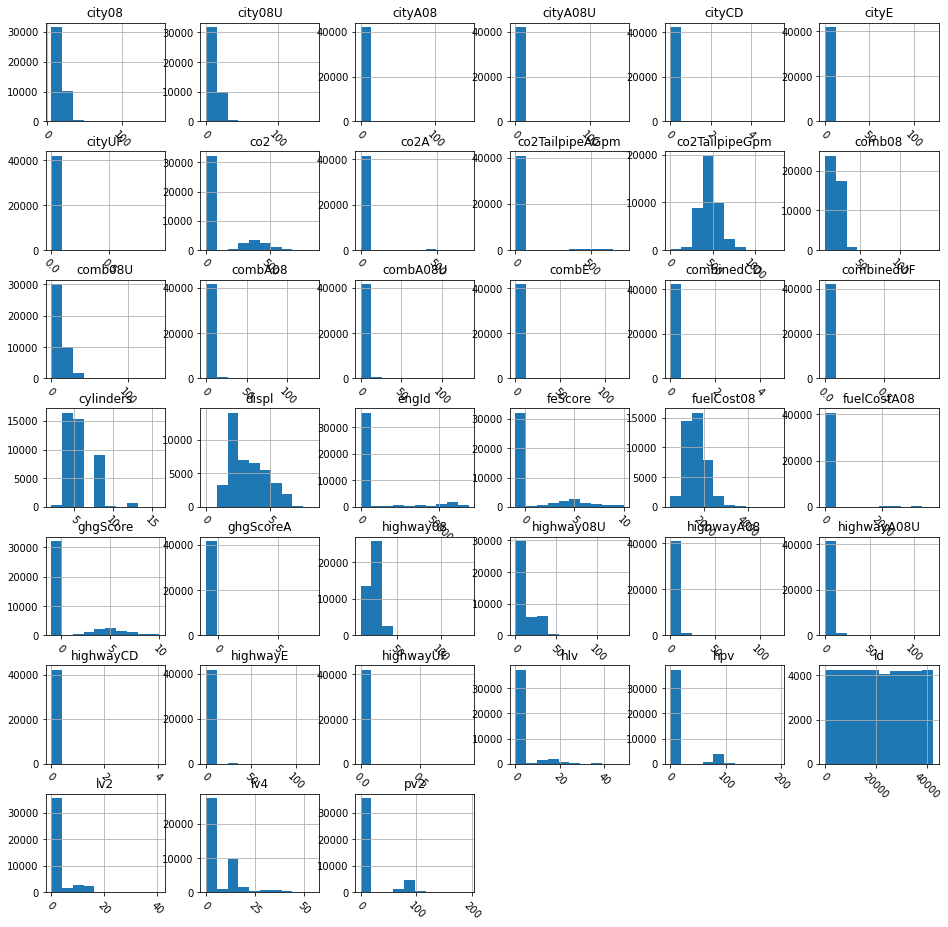

In [136]:
################################DATA exploration################################################
##### histogram for variables 
%matplotlib inline
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress
# Clear the text "residue"
plt.show()

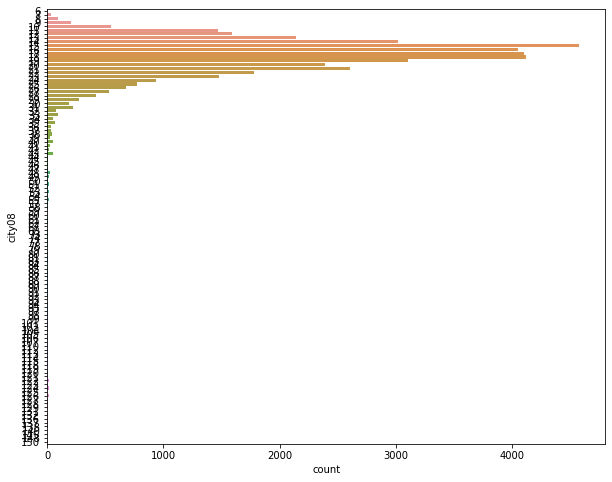

In [137]:
##################  exploring the counts and pattern
plt.figure(figsize=(10,8))
sns.countplot(y='city08', data=df)

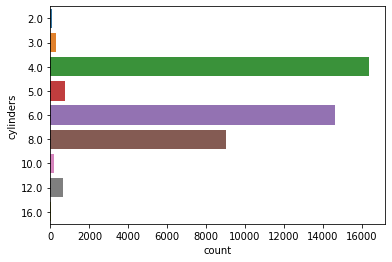

In [138]:
sns.countplot(y='cylinders', data=df)

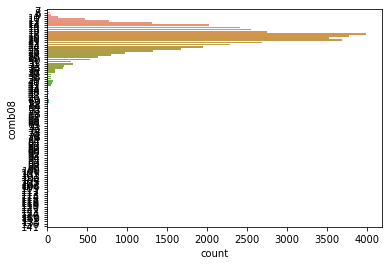

In [139]:
sns.countplot(y='comb08', data=df)

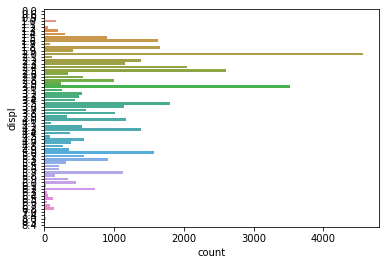

In [140]:
sns.countplot(y='displ', data=df)

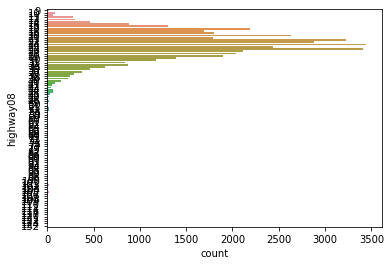

In [141]:
sns.countplot(y='highway08', data=df)

In [142]:
##################  exploring the co relation 
df.corr()

,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2
city08,1.000000,0.694213,0.083093,0.094648,0.004142,0.477664,0.097165,0.045728,-0.034366,-0.077653,-0.727193,0.990726,0.642925,0.076550,0.090105,0.496239,0.002074,0.095986,-0.686375,-0.720365,0.021511,0.429343,-0.573078,-0.075565,0.428558,-0.013583,0.943044,0.567610,0.066232,0.082424,-0.000680,0.516876,0.094307,0.224691,0.243468,0.208868,0.006194,0.119682,0.004408
city08U,0.694213,1.000000,0.152005,0.169624,0.014195,0.378154,0.126839,0.562325,0.095987,0.046961,-0.469286,0.691663,0.994977,0.152919,0.173660,0.389459,0.011397,0.126111,-0.137861,-0.161313,-0.240643,0.820547,-0.277476,0.050698,0.819552,0.109995,0.668078,0.974217,0.152493,0.178338,0.007496,0.401743,0.125015,0.049890,0.043384,0.657310,-0.067162,0.007353,-0.046117
cityA08,0.083093,0.152005,1.000000,0.971831,0.065184,0.552166,0.891814,0.062318,0.235008,0.341288,-0.127085,0.074063,0.148223,0.996636,0.968894,0.552539,0.052992,0.888722,-0.011053,-0.010568,-0.058195,0.190157,-0.063648,0.368311,0.204356,0.255446,0.055650,0.139094,0.981034,0.955097,0.035965,0.551372,0.883630,0.002148,-0.001791,0.137268,-0.039370,-0.004159,-0.038004
cityA08U,0.094648,0.169624,0.971831,1.000000,0.067799,0.566565,0.909484,0.077651,0.243869,0.215289,-0.143861,0.086299,0.166543,0.961598,0.997191,0.566986,0.055345,0.906246,-0.029307,-0.029787,-0.047741,0.209059,-0.067718,0.243081,0.223665,0.264918,0.067886,0.157986,0.935922,0.983257,0.037942,0.565730,0.901082,0.009356,0.005930,0.135874,-0.031918,0.001283,-0.029945
cityCD,0.004142,0.014195,0.065184,0.067799,1.000000,0.100048,0.140159,0.016968,-0.001421,-0.002207,-0.010252,0.002580,0.014317,0.072074,0.075201,0.099518,0.993281,0.139052,0.006709,-0.000519,-0.005380,0.019697,0.005396,-0.002231,0.022890,-0.001417,0.000740,0.013930,0.081126,0.085252,0.961089,0.100001,0.137394,-0.000734,-0.001368,0.014307,-0.004848,-0.002784,-0.005099
cityE,0.477664,0.378154,0.552166,0.566565,0.100048,1.000000,0.638103,0.000448,-0.011274,-0.017507,-0.275574,0.452128,0.345348,0.549957,0.568800,0.998359,0.081509,0.642988,-0.035184,-0.045792,-0.042254,0.236815,-0.099557,0.015252,0.257481,-0.011241,0.396207,0.296222,0.536434,0.561690,0.055649,0.991948,0.648587,0.051928,0.041830,0.126287,-0.033897,-0.001753,-0.032831
cityUF,0.097165,0.126839,0.891814,0.909484,0.140159,0.638103,1.000000,0.018647,-0.007517,-0.011672,-0.157171,0.087671,0.119803,0.868743,0.892976,0.635797,0.126813,0.999648,-0.051983,-0.059476,-0.028171,0.176767,-0.054817,0.024982,0.194386,-0.007495,0.065902,0.106333,0.824370,0.857461,0.106215,0.630715,0.998212,0.011975,0.010972,0.090847,-0.018564,0.012482,-0.016767
co2,0.045728,0.562325,0.062318,0.077651,0.016968,0.000448,0.018647,1.000000,0.270678,0.113583,-0.142430,0.069247,0.611713,0.070314,0.088329,-0.001275,0.016181,0.018996,0.089680,0.060093,-0.242881,0.790344,-0.000143,0.115301,0.788467,0.241801,0.107977,0.667853,0.081157,0.103919,0.014796,-0.003369,0.019421,-0.075873,-0.080904,0.700291,-0.034688,-0.055884,-0.009346
co2A,-0.034366,0.095987,0.235008,0.243869,-0.001421,-0.011274,-0.007517,0.270678,1.000000,0.600919,0.033341,-0.033433,0.106996,0.272016,0.283905,-0.011388,-0.001252,-0.007529,0.079460,0.092784,-0.053950,0.140582,0.000850,0.601211,0.140569,0.881685,-0.028667,0.120682,0.324590,0.344147,-0.001002,-0.011481,-0.007536,-0.031713,-0.035852,0.142311,-0.035941,-0.034895,-0.035610
co2TailpipeAGpm,-0.077653,0.046961,0.341288,0.215289,-0.002207,-0.017507,-0.011672,0.113583,0.600919,1.000000,0.110356,-0.082930,0.054719,0.394140,0.251575,-0.017683,-0.001945,-0.011691,0.154829,0.176309,-0.084877,0.029486,0.034128,0.996814,0.029529,0.543609,-0.083752,0.064804,0.468784,0.306360,-0.001556,-0.017828,-0.011702,-0.055964,-0.061805,0.133946,-0.060909,-

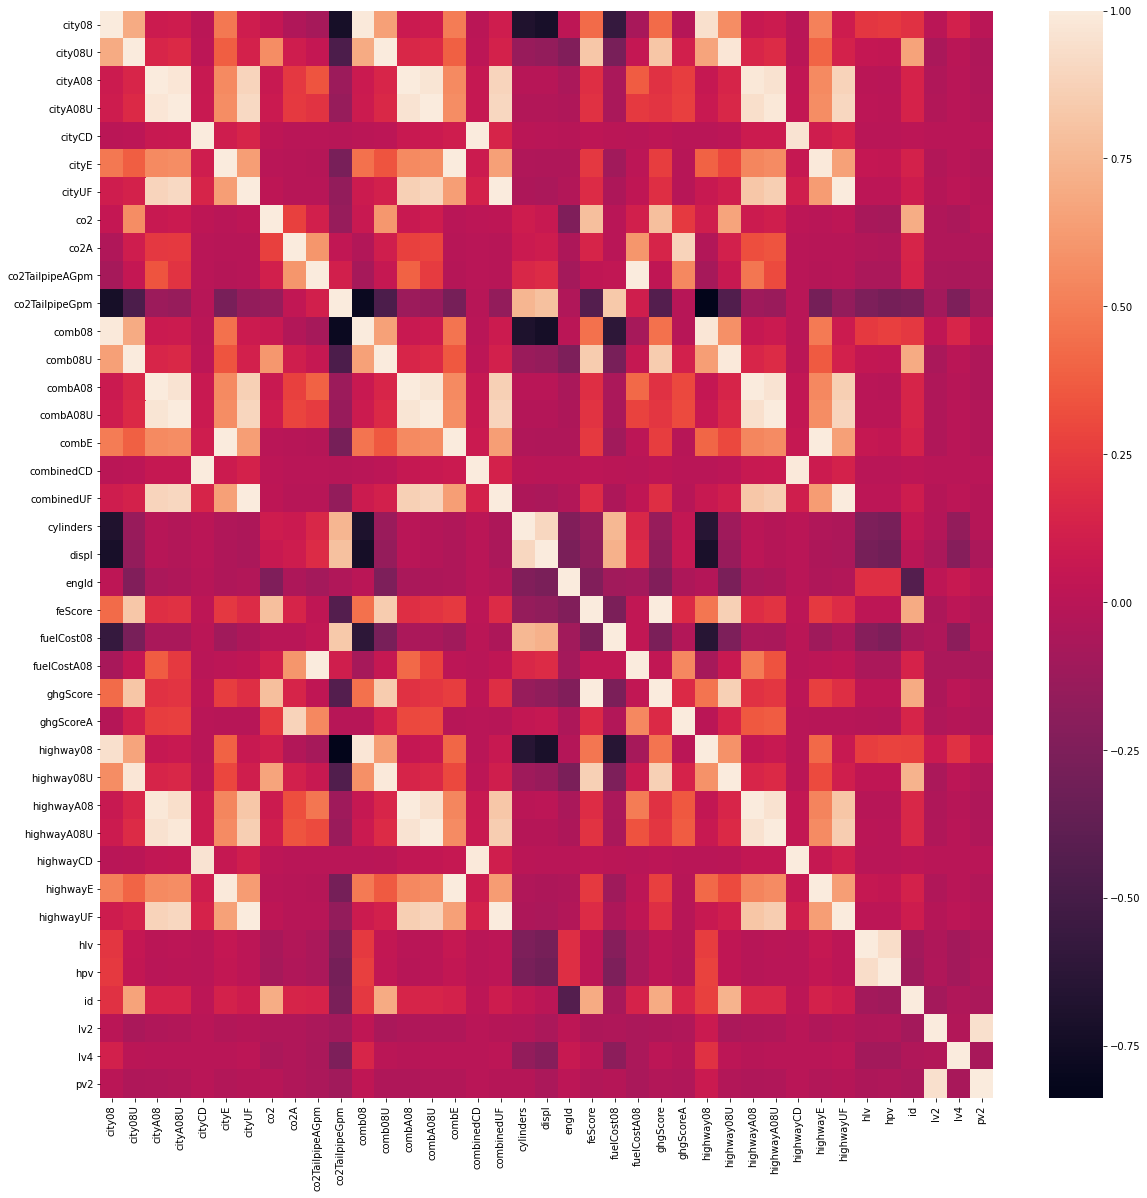

In [143]:
##########  corelation in a heat map 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = False)

In the observation in DataFrame "df" , for few of the values appears as  "?" , needs to be replaced with imputed values.

In [0]:
## replacing unknown values with NaN 
df=df.replace("?",np.NaN)

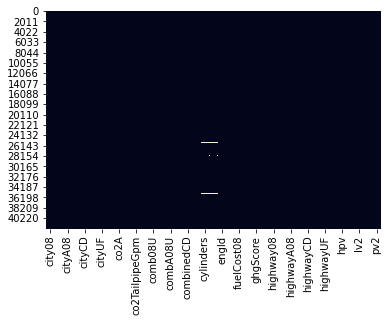

In [145]:
## visulizing nulls density in heatmap
sns.heatmap(df.isnull(), cbar=False)

In [146]:
######### impute with mean  
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)
df=imp.transform(df)
dftest=df
type(df)

numpy.ndarray

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [147]:
# training the model
clf = IsolationForest(max_samples=100, random_state=rng)
df=clf.fit(df)
type(df)

sklearn.ensemble._iforest.IsolationForest

In [148]:
# predictions
y_pred_train = clf.predict(dftest)
print(y_pred_train[1:50])

y_pred_train[832] ### anomaly 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


-1

the above observation classifies as anomaly , we will change the values to normal in the source file and rerun the whole workflow , the predication should classify as normal.

In [149]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_train).count(1)/y_pred_train.shape[0])

Accuracy: 0.8728598830187786
